# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
row_elements = soup.find_all('tr', class_='data-row')

# Checking
row_elements[0]

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
for row in row_elements:
    row_info = row.find_all('td')
    row_id = int(row_info[0].get_text())
    earth_date = row_info[1].get_text()
    sol = int(row_info[2].get_text())
    ls = int(row_info[3].get_text())
    mars_month = int(row_info[4].get_text())
    min_temp = float(row_info[5].get_text())
    pressure = float(row_info[6].get_text())
    entry = {
        'id': row_id,
        'terrestrial_date': pd.to_datetime(earth_date),
        'sol': sol,
        'ls': ls,
        'month': mars_month,
        'min_temp': min_temp,
        'pressure': pressure
    }
    data.append(entry)

#Displaying the first 6 entries
data[0:5]

[{'id': 2,
  'terrestrial_date': Timestamp('2012-08-16 00:00:00'),
  'sol': 10,
  'ls': 155,
  'month': 6,
  'min_temp': -75.0,
  'pressure': 739.0},
 {'id': 13,
  'terrestrial_date': Timestamp('2012-08-17 00:00:00'),
  'sol': 11,
  'ls': 156,
  'month': 6,
  'min_temp': -76.0,
  'pressure': 740.0},
 {'id': 24,
  'terrestrial_date': Timestamp('2012-08-18 00:00:00'),
  'sol': 12,
  'ls': 156,
  'month': 6,
  'min_temp': -76.0,
  'pressure': 741.0},
 {'id': 35,
  'terrestrial_date': Timestamp('2012-08-19 00:00:00'),
  'sol': 13,
  'ls': 157,
  'month': 6,
  'min_temp': -74.0,
  'pressure': 732.0},
 {'id': 46,
  'terrestrial_date': Timestamp('2012-08-20 00:00:00'),
  'sol': 14,
  'ls': 157,
  'month': 6,
  'min_temp': -74.0,
  'pressure': 740.0}]

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data)

In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [10]:
# Change data types for data analysis
# Already done upon initialization!

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
number_of_months = len(mars_df['month'].unique())
number_of_months

12

In [13]:
# 2. How many Martian days' worth of data are there?
sols_of_data = len(mars_df['sol'].unique())
sols_of_data

1867

In [14]:
# 3. What is the average low temperature by month?
# .mean()
by_month = mars_df.groupby('month').mean()
avg_low_by_month = by_month['min_temp']
avg_low_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

(-85.0, -67.0)

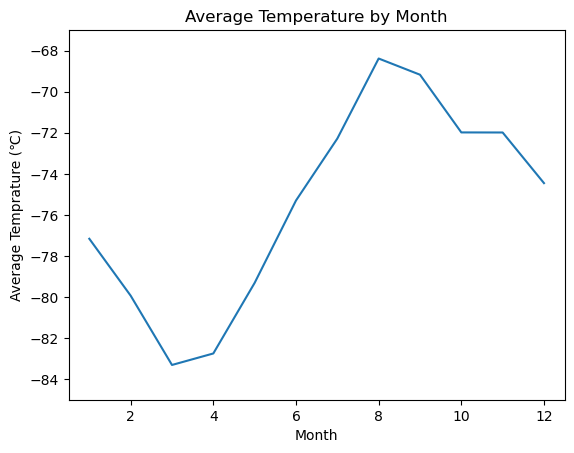

In [15]:
# Plot the average temperature by month
plt.plot(avg_low_by_month)
plt.xlabel('Month')
plt.ylabel('Average Temprature (℃)')
plt.title('Average Temperature by Month')
plt.xlim(0.5,12.5)
plt.ylim(-85,-67)

In [16]:
# Identify the coldest and hottest months in Curiosity's location

print('--------------------------------------------------')
for x in range(len(avg_low_by_month)):
    month = avg_low_by_month.index[x]
    avg_low = avg_low_by_month[month]
    if avg_low == avg_low_by_month.max():
        print(f'Hottest Month: {month}\tAverage Min Temp: {round(avg_low_by_month.max(), 2)}℃')
        print('--------------------------------------------------')
    elif avg_low == avg_low_by_month.min():
        print(f'Coldest Month: {month}\tAverage Min Temp: {round(avg_low_by_month.min(), 2)}℃')
        print('--------------------------------------------------')

--------------------------------------------------
Coldest Month: 3	Average Min Temp: -83.31℃
--------------------------------------------------
Hottest Month: 8	Average Min Temp: -68.38℃
--------------------------------------------------


In [17]:
# 4. Average pressure by Martian month
avg_pressure_by_month = by_month['pressure']
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

(700.0, 975.0)

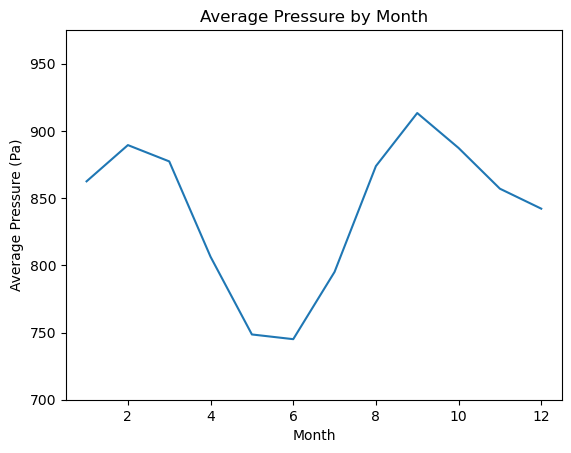

In [18]:
# Plot the average pressure by month
plt.plot(avg_pressure_by_month)
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.title('Average Pressure by Month')
plt.xlim(0.5,12.5)
plt.ylim(700,975)

In [19]:
# Saving only the data that cooresponds with the Northern Hemisphere's Spring Equinox
# The Solar Longitude is 0 on the Spring Equinox (Northern Hemisphere)
nhem_spring_eq = mars_df.loc[mars_df['ls'] == 0, :]
nhem_spring_eq

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [20]:
d = timedelta(days=1)
day_counter = 0
# Since two dates show back-to-back each year, we take the first of these two dates and record them
day_ref = nhem_spring_eq['terrestrial_date'][304]
end_ref1 = nhem_spring_eq['terrestrial_date'][925]
end_ref2 = nhem_spring_eq['terrestrial_date'][1579]

# Looping through and recording the number of days in a year
while day_ref < end_ref1:
    day_ref += d
    day_counter += 1
print(day_counter)
day_counter = 0

# Checking that the numbers match with a 2ⁿᵈ Year 
# Note: They may be off by 1 day. This is normal, as years do not line up perfactly.
# Here however, they match exactly!
while day_ref < end_ref2:
    day_ref += d
    day_counter += 1
print(day_counter)

687
687


In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?
martian_year = day_counter
print(f'There are roughly {martian_year} terrestrial days in one Martian year')

There are roughly 687 terrestrial days in one Martian year


In [22]:
# Just for fun . . . Calculating the number of Martian Days in one Martian Year!
counter1 = 0
m_ref = nhem_spring_eq['sol'][304]
m_end1 = nhem_spring_eq['sol'][925]
m_end2 = nhem_spring_eq['sol'][1579]

while m_ref < m_end1:
    m_ref += 1
    counter1 += 1
counter2 = 0
while m_ref < m_end2:
    m_ref += 1
    counter2 += 1
print(f'There are {counter1} - {counter2} Martian days in one Martian year')

There are 668 - 669 Martian days in one Martian year


# On average
- the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

- Comparatively however, it is still within range of tempratures on Earth. At the [Amundsen–Scott South Pole Station](https://en.wikipedia.org/wiki/Amundsen%E2%80%93Scott_South_Pole_Station#Climate) in Antarctica, for example, the average low fluxuates between -20℃ and -82℃, and maintains a **constant** human presance, *albiet less-so in the **Autumn Months** of (March - May) and **Winter Months** of (June - September) when the sun is down 24/7*

# Atmospheric pressure is, on average, 
- lowest in the sixth month and highest in the ninth.

- This is very low, and is comprable to air pressure around 31.7km to 33.4km above sea level, an altitude about 3½ times higher than the tip of Mt Everest, and about 3 as high as commercial airliners typically fly. 
- It is less then 1% the pressure of our atmosphere at sea level. (0.007atm - 0.009atm)

# One Year on Mars
- The time it takes for Solar Longitude `ls` to make a full 360° circle (from ls = 0° to ls = 0°) is roughly **687** terrestrial (Earth) days, which gives us the length of a year on Mars!
##### Using Solar Longitude is ***much a more accurate*** way to determine the number of terrestrial (Earth) days in a Martian year with the provided data! *as opposed to trying to determine it based on temprature fluctuations*
- [An Internet search](https://en.wikipedia.org/wiki/Mars) that a year on Mars is indeed equivalent to **687 earth days***. *686.98 to be exact*

## For fun,
- *we can even look up how many Martian Days (Sols) are in one Martian year!* Given this data, it appears to be ***668 - 669 Sols*** *Martian Days. 
- [An Internet search](https://en.wikipedia.org/wiki/Mars) confirms that a year on Mars is 668.5991 Sols*

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
mars_df.to_csv("Output/mars_data.csv", index=False, header=True)

In [24]:
browser.quit()